Specific heat of Solids:

1) Dulong-Petit Law: $C_{v} = 3R$

2) Einstein's theory: $C_{v} = 3R \frac{exp(\frac{E_{t}}{T})(\frac{E_{t}}{T})^2}{(exp(\frac{E_{t}}{T})-1)^2} $

3) Debye's theory: $ C_{v} = 9R (\frac{T}{D_{t}})^3 \int_{0}^{D_{t}/T} \frac{x^4 e^x}{(e^x-1)^2}dx $

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import quad

In [3]:
R = 8.314      
h = int(input("Temperature step-size"))
n = 5000//h
T = np.linspace(1,5000,n)    
et = 2000                          
dtemp = 500                 #Einsteins & DeBye Temperatures

stepsize of temperatures: 1


In [4]:
def fp(T):
    H = 3*R     #Cv=3*R
    return H

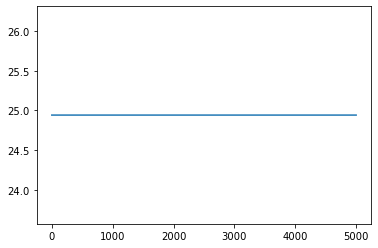

In [5]:
Cvp = np.zeros(n)
for i in range(n):
    Cvp[i] = fp(T[i])    
plt.plot(T,Cvp)

In [6]:
def fe(T):
    H = 3*R*np.exp(et/T)*((et/T)**2)/((np.exp(et/T)-1)**2)    
    return H

<ipython-input-6-6f8e654ec7e5>:2: RuntimeWarning: overflow encountered in exp
  H = 3*R*np.exp(et/T)*((et/T)**2)/((np.exp(et/T)-1)**2)
<ipython-input-6-6f8e654ec7e5>:2: RuntimeWarning: invalid value encountered in double_scalars
  H = 3*R*np.exp(et/T)*((et/T)**2)/((np.exp(et/T)-1)**2)
<ipython-input-6-6f8e654ec7e5>:2: RuntimeWarning: overflow encountered in double_scalars
  H = 3*R*np.exp(et/T)*((et/T)**2)/((np.exp(et/T)-1)**2)


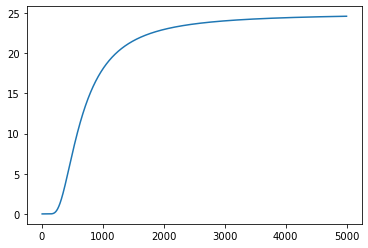

In [7]:
Cve = np.zeros(n)
for i in range(n):
    Cve[i] = fe(T[i])
plt.plot(T,Cve)

In [8]:
def f(x):                        
    return ((x**4)*(np.exp(x)))/((np.exp(x)-1)**2)
def fd(T):    
    xm = (dtemp)/T
    F = quad(f,0,xm)              
    Cv = 9*R*((1/xm)**3)*F[0]    
    return Cv

<ipython-input-8-e7a3c26a9c9c>:2: RuntimeWarning: overflow encountered in double_scalars
  return ((x**4)*(np.exp(x)))/((np.exp(x)-1)**2)


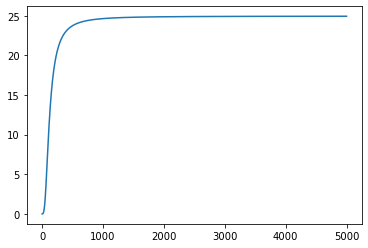

In [9]:
Cvd = np.zeros(n)
for i in range(n):
    Cvd[i] = fd(T[i])    
plt.plot(T,Cvd)

Text(0.5, 1.0, 'Specific Heat vs Temperature')

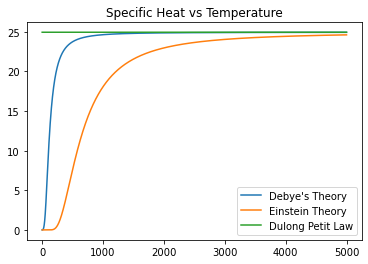

In [10]:
plt.plot(T,Cvd)
plt.plot(T,Cve)
plt.plot(T,Cvp)
plt.legend(["Debye's Theory ","Einstein Theory ","Dulong Petit Law"])
plt.title ('Specific Heat vs Temperature')